<a href="https://colab.research.google.com/github/SobuzDas/ML-Project/blob/main/BasicNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Dataset-1/Social_Network_Ads.csv - Social_Network_Ads.csv.csv')
x = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:, -1].values

In [5]:
print (x)

[['Male' 19 19000]
 ['Male' 35 20000]
 ['Female' 26 43000]
 ...
 ['Female' 50 20000]
 ['Male' 36 33000]
 ['Female' 49 36000]]


In [6]:
print (y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [7]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)

In [10]:
x


array([[1.        , 0.02380952, 0.02962963],
       [1.        , 0.4047619 , 0.03703704],
       [0.        , 0.19047619, 0.20740741],
       ...,
       [0.        , 0.76190476, 0.03703704],
       [1.        , 0.42857143, 0.13333333],
       [0.        , 0.73809524, 0.15555556]])

In [11]:
x.shape


(400, 3)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [13]:
x_train.shape

(280, 3)

In [14]:
multiclass_y=[1,2,2,2,2,3,1,2,3,4]

In [15]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
label_list = lb.fit_transform(multiclass_y)

In [16]:
label_list


array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [20]:
hist = model.fit(x_train,y_train, epochs =100, batch_size= 32)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 0.6859 - accuracy: 0.5393
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.6643
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.7000
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6750
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.6571
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6571
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6571
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6571
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6571
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6571
Epoch 11/100
9/9 [===========

In [21]:
acc = hist.history['accuracy']
loss = hist.history['loss'] 

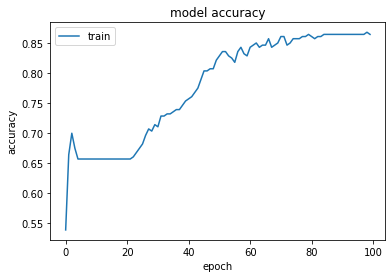

<Figure size 432x288 with 0 Axes>

In [22]:
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

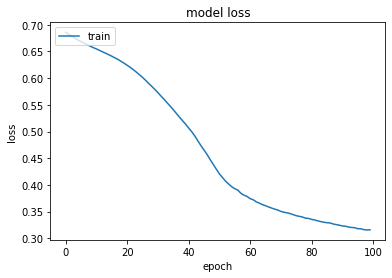

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')


In [24]:
history_test = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.8917


In [25]:
history_test

[0.2529393434524536, 0.8916666507720947]